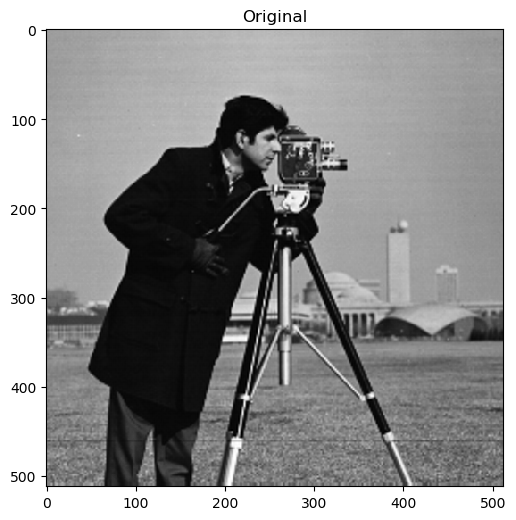

In [5]:
from skimage import data
from scipy import misc
from scipy import signal as sg
import matplotlib.pyplot as plt
import numpy as np

cameraIMG = data.camera()

fig = plt.figure(figsize=(10,10), dpi=100)
a = fig.add_subplot(1,2,1)
plt.imshow(cameraIMG, cmap=plt.cm.gray)
a.set_title('Original')
plt.tight_layout()
plt.show()

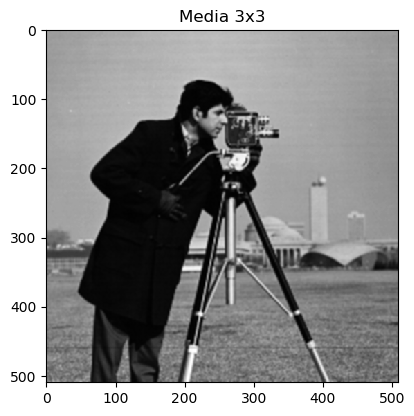

In [6]:
from scipy import signal as sg

media3 = [[1./9., 1./9., 1./9.], 
          [1./9., 1./9., 1./9.], 
          [1./9., 1./9., 1./9.]]

c_media = sg.convolve(cameraIMG, media3, "valid")

fig = plt.figure(figsize=(10,10), dpi=100)
a = fig.add_subplot(1,2,2)
plt.imshow(c_media, cmap=plt.cm.gray)
a.set_title('Media 3x3')
plt.show()

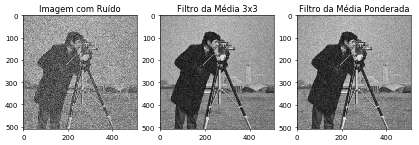

In [7]:
row,col= cameraIMG.shape
ch = 1
mean = 0
var = 50
sigma = var**0.9
gauss = np.random.normal(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col)
noisy = cameraIMG + gauss

n_media = sg.convolve(noisy, media3, "valid")

media_p = [[1./16., 2./16., 1./16.],
           [2./16., 4./16., 2./16.],
           [1./16., 2./16., 1./16.]]

n_media_p = sg.convolve(noisy, media_p, "valid")

fig = plt.figure(figsize=(10,10), dpi=50)
a = fig.add_subplot(1,3,1)
plt.imshow(noisy, cmap=plt.cm.gray)
a.set_title('Imagem com Ruído')

a = fig.add_subplot(1,3,2)
plt.imshow(n_media, cmap=plt.cm.gray)
a.set_title('Filtro da Média 3x3')

a = fig.add_subplot(1,3,3)
plt.imshow(n_media_p, cmap=plt.cm.gray)
a.set_title('Filtro da Média Ponderada')

plt.show()

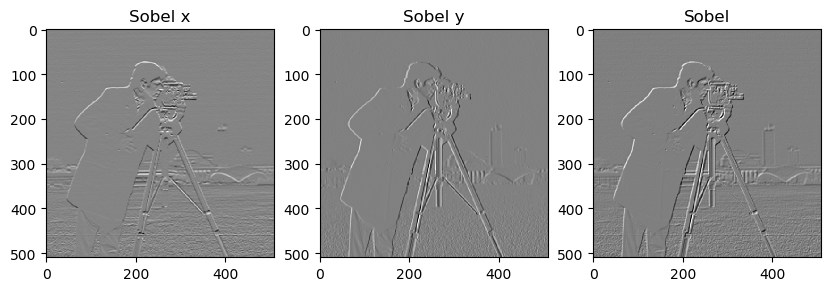

In [8]:
sobel_x = [[-1, -2, -1], 
           [0,   0, 0], 
           [1,   2, 1]]

sobel_y = [[-1, 0,  1], 
           [-2, 0,  2],
           [-1, 0,  1]]

c_sbl_x = sg.convolve(cameraIMG, sobel_x, "valid")
c_sbl_y = sg.convolve(cameraIMG, sobel_y, "valid")

c_sbl = c_sbl_x + c_sbl_y

fig = plt.figure(figsize=(10,10), dpi=100)
a = fig.add_subplot(1,3,1)
plt.imshow(c_sbl_x, cmap=plt.cm.gray)
a.set_title('Sobel x')

a = fig.add_subplot(1,3,2)
plt.imshow(c_sbl_y, cmap=plt.cm.gray)
a.set_title('Sobel y')

a = fig.add_subplot(1,3,3)
plt.imshow(c_sbl, cmap=plt.cm.gray)
a.set_title('Sobel')


plt.show()